We decided to use this kaggle dataset to conduct our models, https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-film-statistics-dataset-for-ml/data. Which holds 14 columns of features and over 4000 entries of box office movie numbers. This dataset also holds multiple different qualitiative and quantititive data points that can help the model generalize and recognize trends in data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import mean_absolute_error
og_data = pd.read_csv("/content/movie_statistic_dataset.csv")
movie_data = pd.read_csv("/content/movie_statistic_dataset.csv")
print(movie_data.head())
print("------------------------------------------------------------------------------------------------------")
print(movie_data.columns)
print("------------------------------------------------------------------------------------------------------")
print(movie_data.shape)

# Convert 'production_date' to datetime if it's not already in datetime format
movie_data['production_date'] = pd.to_datetime(movie_data['production_date'])
movie_data['production_date'] = movie_data['production_date'].dt.year

print(movie_data)
# Replace the 'production_date' column with just the year (in-place update)



                                   movie_title production_date  \
0                     Avatar: The Way of Water      2022-12-09   
1                            Avengers: Endgame      2019-04-23   
2  Pirates of the Caribbean: On Stranger Tides      2011-05-20   
3                      Avengers: Age of Ultron      2015-04-22   
4                       Avengers: Infinity War      2018-04-25   

                     genres  runtime_minutes  director_name  \
0  Action,Adventure,Fantasy            192.0  James Cameron   
1    Action,Adventure,Drama            181.0              -   
2  Action,Adventure,Fantasy            137.0   Rob Marshall   
3   Action,Adventure,Sci-Fi            141.0    Joss Whedon   
4   Action,Adventure,Sci-Fi            149.0              -   

              director_professions director_birthYear director_deathYear  \
0         writer,producer,director               1954              alive   
1                                -                  -                  -

Looking at the dataset, there are a range of values we are given, such as Year, Director, Rating, etc. Determining which of these values need to be dropped due to insignificance or weight will be important. From the get go, there are many missing values in the dataset, meaning we must completely clear rows with missing data.

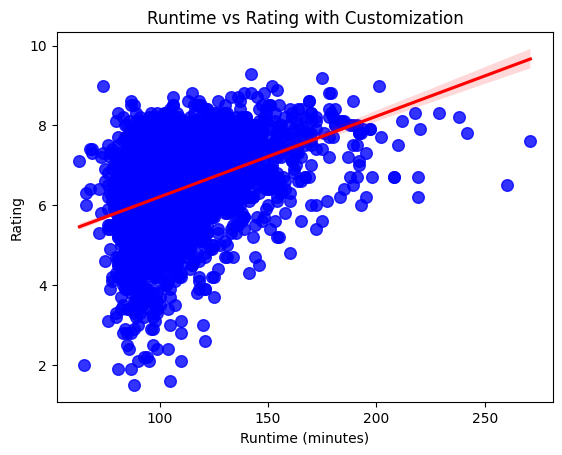

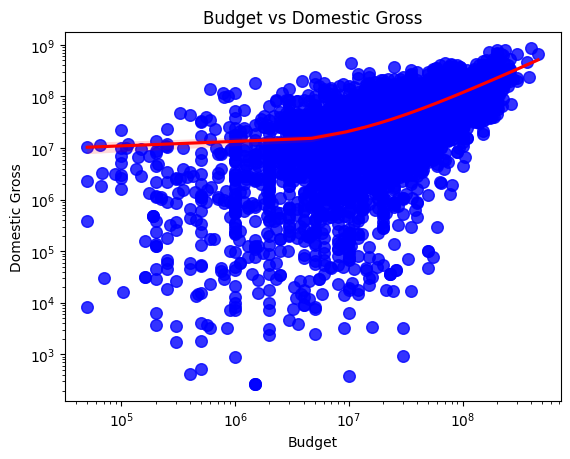

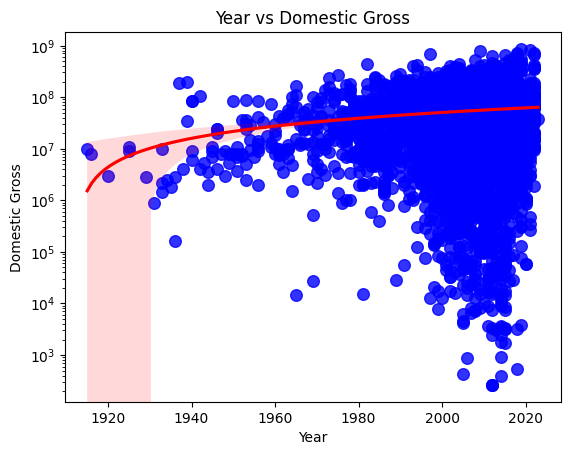

In [ ]:
sns.regplot(data=movie_data, x='runtime_minutes', y='movie_averageRating', scatter_kws={'s': 70, 'color': 'blue'}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Runtime vs Rating with Customization')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')

# Show the plot
plt.show()
sns.regplot(data=movie_data, x='Production budget $', y='Domestic gross $', scatter_kws={'s': 70, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Budget vs Domestic Gross')
plt.xlabel('Budget')
plt.ylabel('Domestic Gross')
plt.xscale('log')
plt.yscale('log')
plt.show()

sns.regplot(data=movie_data, x='production_date', y='Domestic gross $', scatter_kws={'s': 70, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Year vs Domestic Gross')
plt.xlabel('Year')
plt.ylabel('Domestic Gross')
plt.yscale('log')
plt.show()



Above are some of the trends recognized within the data. As we can see, there are some factors that contribute more towards domestic gross than others. There is a common linear relationship between some, where as others have a more logorithmic/polynomial relationship.

Next we must make sure there are no missing values within the dataset, this can be done through the pandas library

In [ ]:
movie_data = movie_data.drop(columns=['movie_title'])
#this does not matter to us or the model.

missing_values = movie_data.isnull().sum()
print(missing_values)

total_missing = movie_data.isnull().sum().sum()
print(f"Total missing values: {total_missing}")




production_date         0
genres                  0
runtime_minutes         0
director_name           0
director_professions    0
director_birthYear      0
director_deathYear      0
movie_averageRating     0
movie_numerOfVotes      0
approval_Index          0
Production budget $     0
Domestic gross $        0
Worldwide gross $       0
dtype: int64
Total missing values: 0


There are no recorded missing values, meaning we do not need to fill any data with data averages or fill with a placeholder when training.

The next step would include standardization of the datapoints above. As done before, we standardized the YYYY-MM-DD time format to a standard year release. This makes interpreting the data much easier and allows us to plot data points more effectivly. This standardization may prove to be negative down the line and may need to be adjusted, as there is possibility that the month/day could alter a movies gross earnings.

It is also important to make sure data is in the correct form all across the board ($ in USD, Runtime is in minutes, average movie rating). Thankfully the dataset we chose is consistent across the board, which almost eliminated any extra sandardization practices other datasets would need.

Another important standardization technique could include one hot encoding the genres and down the line the directors.

In [ ]:
print(movie_data['genres'].head())
# Handle missing or non-string values before splitting
movie_data['genres'] = movie_data['genres'].astype(str).apply(lambda x: x.split(',') if x != 'nan' else [])

# Flatten the lists and get unique genres
unique_genres = pd.Series([genre for sublist in movie_data['genres'] for genre in sublist]).unique()

# Print the unique genres
print(unique_genres)
print(len(unique_genres))

unique_directors = movie_data['director_name'].unique()
print(unique_directors)
print(len(unique_directors))





0    Action,Adventure,Fantasy
1      Action,Adventure,Drama
2    Action,Adventure,Fantasy
3     Action,Adventure,Sci-Fi
4     Action,Adventure,Sci-Fi
Name: genres, dtype: object
['Action' 'Adventure' 'Fantasy' 'Drama' 'Sci-Fi' 'Thriller' 'Animation'
 'Comedy' 'Family' 'Crime' 'Mystery' 'Western' 'Romance' 'Musical'
 'Horror' 'History' 'Biography' 'Documentary' 'War' 'Sport' 'Music' '\\N'
 'Film-Noir' 'News']
24
['James Cameron' '-' 'Rob Marshall' ... 'Vincent Jay Miller' 'Lena Dunham'
 'Jem Cohen']
1835


As shown, there are many different unique genre types within this dataset, we can perform standardzation on this dataset by making. First, we can set any "//N' genre to be unknown, which also setting 'Film-Noir and 'Sc-Fi' into more legible categories. Another thing to consider is whether or not one hot encoding the directors will be benficial to the model. We will start the model WITHOUT the binary encoding and see how it predicts. This could be a problem as encoding over 1800 directors will be very costly to the models performance.

In [ ]:

# Print the updated 'genre' column
print(movie_data['genres'].head())


print(movie_data['genres'].head())

movie_data['genres'] = movie_data['genres'].apply(lambda genre_list: ['Science Fiction' if genre == 'Sci-Fi' else genre for genre in genre_list])
movie_data['genres'] = movie_data['genres'].apply(lambda genre_list: ['Crime' if genre == 'Film-Noir' else genre for genre in genre_list])
movie_data['genres'] = movie_data['genres'].apply(lambda genre_list: ['Unknown' if genre == '\\N' else genre for genre in genre_list])

unique_genres = pd.Series([genre for sublist in movie_data['genres'] for genre in sublist]).unique()

# Print the unique genres
print(unique_genres)

0    [Action, Adventure, Fantasy]
1      [Action, Adventure, Drama]
2    [Action, Adventure, Fantasy]
3     [Action, Adventure, Sci-Fi]
4     [Action, Adventure, Sci-Fi]
Name: genres, dtype: object
0    [Action, Adventure, Fantasy]
1      [Action, Adventure, Drama]
2    [Action, Adventure, Fantasy]
3     [Action, Adventure, Sci-Fi]
4     [Action, Adventure, Sci-Fi]
Name: genres, dtype: object
['Action' 'Adventure' 'Fantasy' 'Drama' 'Science Fiction' 'Thriller'
 'Animation' 'Comedy' 'Family' 'Crime' 'Mystery' 'Western' 'Romance'
 'Musical' 'Horror' 'History' 'Biography' 'Documentary' 'War' 'Sport'
 'Music' 'Unknown' 'News']


We have successfully changed the needed genre names to their respective counterparts listed above. This standrdization will hopefully provide clarity to the model. It may also be smart to one hot encode the genre column.

In [ ]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movie_data['genres'])

genre_data = pd.DataFrame(genre_encoded, columns=mlb.classes_)
print(genre_data.head())
movie_data = pd.concat([movie_data, genre_data], axis=1)

print("Genres corresponding to columns:", mlb.classes_)
movie_data = movie_data.drop(columns=['genres'])
print(movie_data.head())

   Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  Drama  \
0       1          1          0          0       0      0            0      0   
1       1          1          0          0       0      0            0      1   
2       1          1          0          0       0      0            0      0   
3       1          1          0          0       0      0            0      0   
4       1          1          0          0       0      0            0      0   

   Family  Fantasy  ...  Musical  Mystery  News  Romance  Science Fiction  \
0       0        1  ...        0        0     0        0                0   
1       0        0  ...        0        0     0        0                0   
2       0        1  ...        0        0     0        0                0   
3       0        0  ...        0        0     0        0                1   
4       0        0  ...        0        0     0        0                1   

   Sport  Thriller  Unknown  War  Western  
0     

Now it is time to look for trends within the dataset

Axes(0.125,0.11;0.62x0.77)


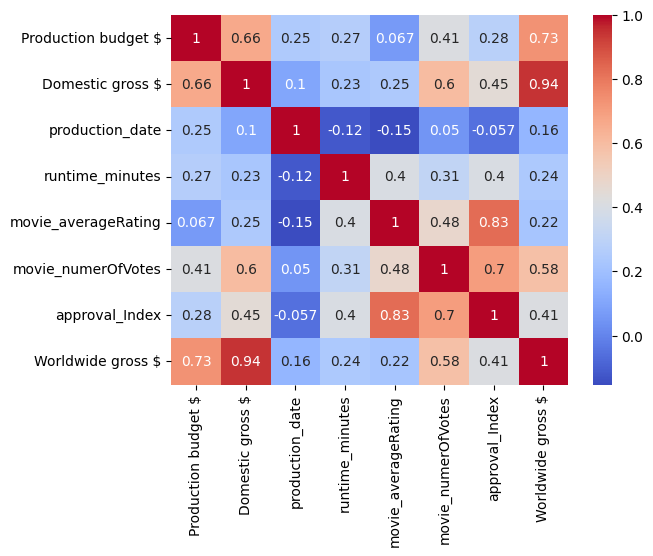

In [ ]:
print(sns.heatmap(movie_data[['Production budget $','Domestic gross $','production_date', 'runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Worldwide gross $']].corr(), annot=True, cmap='coolwarm'))

# Print the correlation matrix


Based off of this heatmap, it is clear there isnt much correlation between datapoints. But there is a clear distinction that the larger the budget in a movie, the larger the domestic gross $. This is most likely valid, as it would make sense as to why a high prodution movie would lead to greater gross money.This heat map does not show any relations between directors or genres. its possible these two datapoints show a high relation to domestic gross $

<Figure size 1500x1200 with 0 Axes>

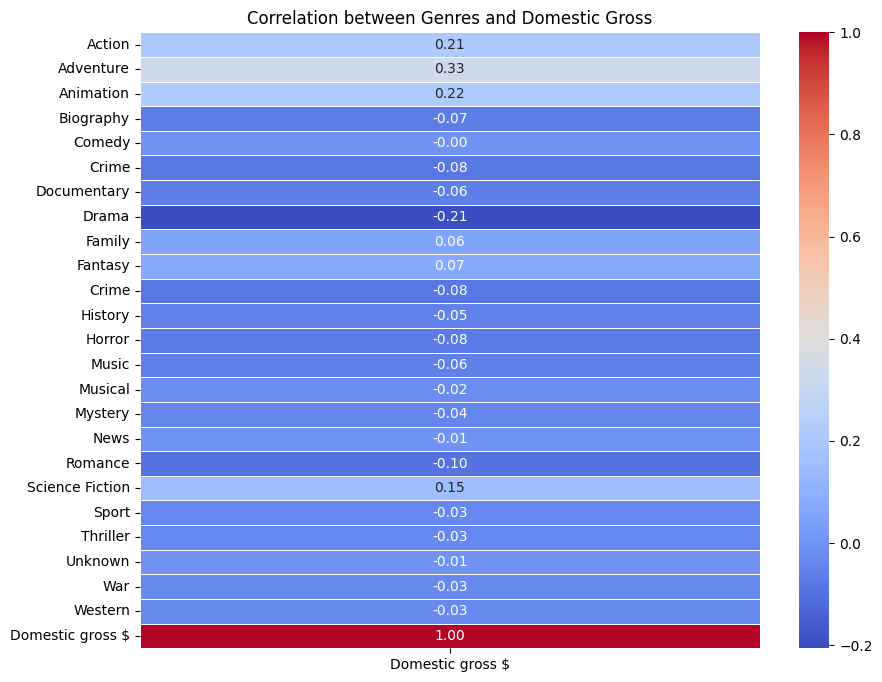

In [ ]:
plt.figure(figsize=(15, 12))  # Adjust the width and height as needed

# Create the heatmap
columns_of_interest = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                       'Documentary', 'Drama', 'Family', 'Fantasy', 'Crime', 'History', 'Horror',
                       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Science Fiction', 'Sport',
                       'Thriller', 'Unknown', 'War', 'Western', 'Domestic gross $']

# Calculate the correlation between the genres and gross_domestic only
corr_data = movie_data[columns_of_interest].corr()

# Plot the heatmap (only genre vs. gross_domestic)
plt.figure(figsize=(10, 8))  # Adjust the figure size
corr_heatmap = sns.heatmap(corr_data[['Domestic gross $']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation between Genres and Domestic Gross')

# Show the plot
plt.show()



Although this is daunting to look at, it is clear there isnt much of a relation between the genre of a movie and how much domestic gross it makes. This could be a result of the data and not necessarily what a model will pick up. Next we will begin traning the model, as we have now successfully done the standardization needed for this model.

In [ ]:
from sklearn.model_selection import train_test_split

movie_data = movie_data.drop(columns=['director_professions'])
movie_data = movie_data.drop(columns=['director_birthYear'])
movie_data = movie_data.drop(columns=['director_deathYear'])
movie_data = movie_data.drop(columns=['Worldwide gross $'])
movie_data = movie_data.drop(columns=['director_name'])


y = movie_data['Domestic gross $'] #creating the label matrix for regression
X = movie_data.drop(columns=['Domestic gross $'])  # Dropping the target column
movie_data = movie_data.drop(columns=['Domestic gross $'])


linear_X_train, linear_X_test, linear_y_train, linear_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_X_train, linear_X_val, linear_y_train, linear_y_val = train_test_split(linear_X_train, linear_y_train, test_size=0.25, random_state=42)


This first test will be done on a simple linear regression model. This will be a good way to test if our data is good enough for simple models. Although this may not be accurate, its a good starting point. Because of this, we will need to drop the directors column since we did not one hot encode it.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(linear_X_train, linear_y_train)

# Predict on the validation set
linear_y_val_pred = model.predict(linear_X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(linear_y_val, linear_y_val_pred)
r2_val = r2_score(linear_y_val, y_val_pred)

print("Validation Mean Squared Error (MSE):", mse_val)
print("Validation R-squared (R²):", r2_val)


# Predict on the test set
linear_y_test_pred = model.predict(linear_X_test)

# Evaluate the model on the test set
mse_test_lr = mean_squared_error(linear_y_test, linear_y_test_pred)
mae_test_lr = mean_absolute_error(linear_y_test, linear_y_test_pred)
r2_test = r2_score(linear_y_test, linear_y_test_pred)



Validation Mean Squared Error (MSE): 2471488975000273.5
Validation R-squared (R²): 0.5150570576080823


Shape of y_test: (876,)
Shape of y_test_pred: (876,)


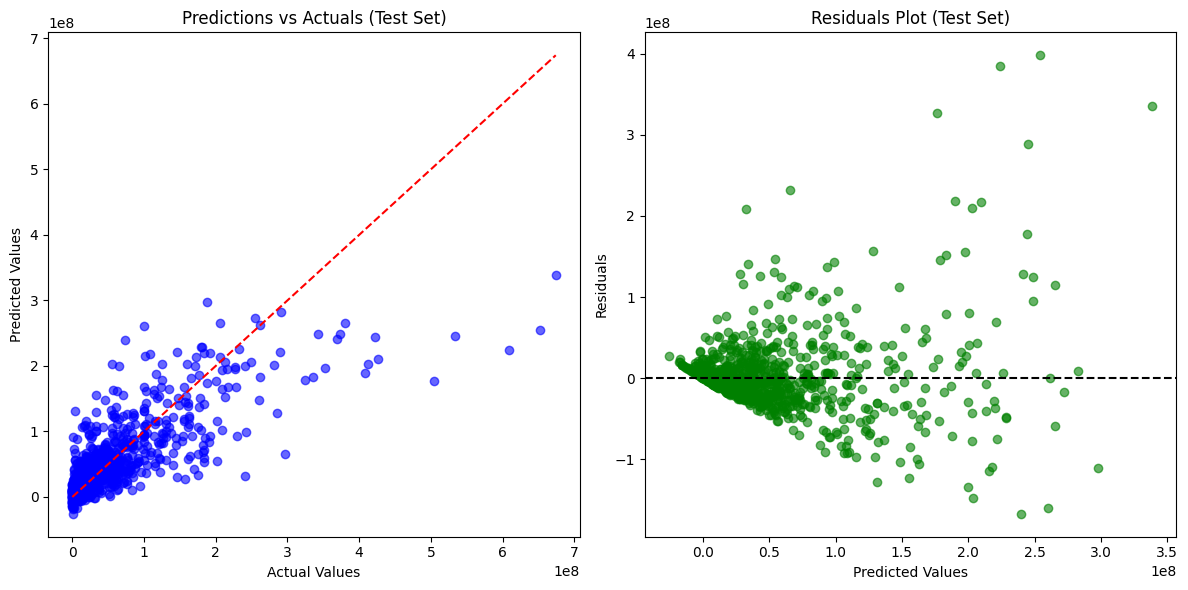

Test Mean Squared Error (MSE): 2479957761558706.5
Test R-squared (R²): 0.6054007143440878
Test Mean Absolute Error (MAE): 28630022.67063507


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
plt.figure(figsize=(12, 6))

print(f"Shape of y_test: {linear_y_test.shape}")
print(f"Shape of y_test_pred: {linear_y_test_pred.shape}")

plt.subplot(1, 2, 1)
plt.scatter(linear_y_test, linear_y_test_pred, color='blue', alpha=0.6)
plt.plot([min(linear_y_test), max(linear_y_test)], [min(linear_y_test), max(linear_y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actuals (Test Set)')

plt.subplot(1, 2, 2)
residuals = linear_y_test - linear_y_test_pred
plt.scatter(linear_y_test_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Test Set)')

plt.tight_layout()
plt.show()

print(f"Test Mean Squared Error (MSE): {mse_test_lr}")
print(f"Test R-squared (R²): {r2_test}")
print(f"Test Mean Absolute Error (MAE): {mae_test_lr}")




These results could say 1 of 2 things, either the data is so messed up the model cannot parse it. or linear regression is not meant to handle the complexity and dimensionality of the problem. Next we will train a new model to see if results are diffferent.

Because we got varying results we are going to move towards a nueral network. In conclusion, it is clear that the data may be too complex for many of these models, as the data is large. We now move towards developing a Neural Network and fully one hot encode the directors, genres, and implement a few relation columns (such as userVotes * budget) to see if we can get better results.

We concluded that the linear regression was not working particularlly well for us so we have decided to attempt to train a neural network to hopefully better capture the nonlinear relationships in the data. They first step will be preparing the data to hopefully be better interpreted by the model. Will however be using this model as a baseline to compare the other models to.

When training a neural network there are several important hyperparameters that must be understood and optimized for the best results. The first is learning rate which determines how much the models weigths should be adjusted by in each step. If this is too high the model may overshoot the best solution.
The next is the number of epochs which controls the number of times the model is run during training. Higher values may cause overfitting.
Batch size is the number of samples that will be run before updating model weights. Smaller batch size will likely generalize to validation set better but train slower.

The activation function defines the output of the neuron. We will use ReLU (Rectified Linear Unit) as it seems to be the industry standard. Sigmoid was demo in class but seems to run into vanising gradient problems. Neural networks also use an optimizers which is the programt that actually updates the weights of the neurons during training. We will be using Adam as it seems to be most commonly used and most accurate.

The last key area is the number of neurons per layer which will effect the networks accuracy. Too many neurons could cause overfitting.



In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD

og_data = pd.read_csv("/content/movie_statistic_dataset.csv")

movie_data = og_data
print(movie_data.head())

                                   movie_title production_date  \
0                     Avatar: The Way of Water      2022-12-09   
1                            Avengers: Endgame      2019-04-23   
2  Pirates of the Caribbean: On Stranger Tides      2011-05-20   
3                      Avengers: Age of Ultron      2015-04-22   
4                       Avengers: Infinity War      2018-04-25   

                     genres  runtime_minutes  director_name  \
0  Action,Adventure,Fantasy            192.0  James Cameron   
1    Action,Adventure,Drama            181.0              -   
2  Action,Adventure,Fantasy            137.0   Rob Marshall   
3   Action,Adventure,Sci-Fi            141.0    Joss Whedon   
4   Action,Adventure,Sci-Fi            149.0              -   

              director_professions director_birthYear director_deathYear  \
0         writer,producer,director               1954              alive   
1                                -                  -                  -

This step just reloads the data from the file and imports that will be needed later.

In [ ]:
# Merge the one-hot encoded genres with the original DataFrame
movie_data['production_date'] = pd.to_datetime(movie_data['production_date'])
# Extract the month
movie_data['production_month'] = movie_data['production_date'].dt.month

movie_data['production_date'] = movie_data['production_date'].dt.year

Here we are spliting the date column into two colunms, which contain year and month. This will hopefully allow the model to capture the relationship between release month and box office success due to summer blockbusters.

In [ ]:
movie_data['genres'] = movie_data['genres'].apply(lambda x: x.split(','))
movie_data['genres'] = movie_data['genres'].apply(lambda genre_list: ['Unknown' if genre == '\\N' else genre for genre in genre_list])

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movie_data['genres'])

genre_data = pd.DataFrame(genre_encoded, columns=mlb.classes_)
print(genre_data.head())
movie_data = pd.concat([movie_data, genre_data], axis=1)

print("Genres corresponding to columns:", mlb.classes_)
movie_data = movie_data.drop(columns=['genres'])

   Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  Drama  \
0       1          1          0          0       0      0            0      0   
1       1          1          0          0       0      0            0      1   
2       1          1          0          0       0      0            0      0   
3       1          1          0          0       0      0            0      0   
4       1          1          0          0       0      0            0      0   

   Family  Fantasy  ...  Musical  Mystery  News  Romance  Sci-Fi  Sport  \
0       0        1  ...        0        0     0        0       0      0   
1       0        0  ...        0        0     0        0       0      0   
2       0        1  ...        0        0     0        0       0      0   
3       0        0  ...        0        0     0        0       1      0   
4       0        0  ...        0        0     0        0       1      0   

   Thriller  Unknown  War  Western  
0         0        0    0

In the original data the genre of a movie is stored as a string containing a list of genres which pertain to the movie. The model will likely struggle to parse this. To solve this problem we will split the terms and create a column for each one which will contain a 1 if the genre applies to the given film. This will hopefully allow the model to understand the relationship between each genre and the films performance.

In [ ]:
movie_data.replace('-', np.nan, inplace=True)
movie_data.replace('\\N', np.nan, inplace=True)

# Drop any row that has a missing value in any column
movie_data = movie_data.dropna()

We have decided to drop the rows containing missing values because we felt that other methods of replacement would not be helpfull in this circumstance.

In [ ]:
director_mean_gross = movie_data.groupby('director_name')['Domestic gross $'].mean()

movie_data['director_encoded'] = movie_data['director_name'].map(director_mean_gross)

movie_data = movie_data.drop(columns=['director_name'])

print(movie_data['director_encoded'])

0       3.317990e+08
2       1.314013e+08
3       3.692928e+08
5       1.584283e+08
6       1.241032e+08
            ...     
4375    1.152937e+07
4376    5.613704e+06
4377    2.335352e+06
4378    3.916740e+05
4379    8.374000e+03
Name: director_encoded, Length: 3490, dtype: float64


Right now the data only contains the directors name. We are replacing this with then mean performance of the directors pervious films which will allow the model to learn the effect of a given director on the films performance.

In [ ]:
movie_data['director_birthYear'] = movie_data['director_birthYear'].astype(int)
movie_data['age_at_release'] = movie_data['production_date'] - movie_data['director_birthYear']
print(movie_data['director_birthYear'])
movie_data = movie_data.drop(columns=['director_birthYear'])

movie_data['is_alive_at_release'] = movie_data.apply(
    lambda row: True if row['director_deathYear'] is None or row['director_deathYear'] == 'alive' else False, axis=1
)

movie_data = movie_data.drop(columns=['director_deathYear'])

movie_data = movie_data.drop(columns=['director_professions', 'movie_title'])

0       1954
2       1960
3       1964
5       1966
6       1965
        ... 
4375    1970
4376    1968
4377    1973
4378    1986
4379    1962
Name: director_birthYear, Length: 3490, dtype: int64


Here we are creating two columns which contain the directors age at the time of the films release and a binary values that informs weather the director is still alive at the time of the films release.

In [ ]:
movie_data['budget_rating_interaction'] = movie_data['Production budget $'] * movie_data['movie_averageRating']
movie_data['votes_runtime_interaction'] = movie_data['movie_numerOfVotes'] * movie_data['runtime_minutes']
movie_data['log_production_budget'] = np.log1p(movie_data['Production budget $'])
correlation_matrix = movie_data.corr()

These are the final new variables added which will hopefully capture the relationship between variables. Along with this we have included a log scaled production budget which will hopefully avoid the wide range between budgets.

In [ ]:

correlation_matrix = movie_data.corr()

correlation_with_target = correlation_matrix['Domestic gross $'].sort_values(ascending=False)
print(correlation_with_target)

Domestic gross $             1.000000
Worldwide gross $            0.937080
director_encoded             0.697744
budget_rating_interaction    0.691849
Production budget $          0.649935
movie_numerOfVotes           0.590771
votes_runtime_interaction    0.573694
log_production_budget        0.481530
approval_Index               0.434129
Adventure                    0.303669
runtime_minutes              0.257810
Action                       0.247675
movie_averageRating          0.214075
Sci-Fi                       0.179046
production_date              0.122685
Animation                    0.112376
Fantasy                      0.098137
is_alive_at_release          0.074615
Family                       0.073466
age_at_release              -0.004496
News                        -0.006747
production_month            -0.009248
Thriller                    -0.015592
Musical                     -0.022611
Sport                       -0.027252
Film-Noir                   -0.027307
Western     

In [ ]:
X = movie_data[['log_production_budget', 'Production budget $','movie_numerOfVotes' ,'movie_averageRating' ,'runtime_minutes', 'is_alive_at_release','director_encoded', 'production_date',
                'Action' ,'Adventure','Animation' , 'Comedy', 'Drama', 'Family', 'Fantasy',  'Music', 'Sci-Fi',
                'votes_runtime_interaction', 'budget_rating_interaction', 'approval_Index']]
y = movie_data['Domestic gross $']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (important for training a neural network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In the first Neural network, we begin by finding the weights of inputs that we plan to put into the model. As we can see, many of the genres prove to have little to no correlation to the model. To reduce the fluff and possible model training issies, we removed them from the input list. After dropping these, we then split, and scalered the X_train and X_test in hopes of more consistent results

We are unable to import the Kerass Regressor into google colab so we have reasearched how to create a custom wrapper class that should hopefully achieve a similar result.

In [ ]:
from sklearn.base import BaseEstimator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

class KerasRegressorCustom(BaseEstimator):
    def __init__(self, learning_rate=0.01, num_neurons=64, epochs=100, batch_size=8):
        self.learning_rate = learning_rate
        self.num_neurons = num_neurons
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def create_model(self):
        model = Sequential()
        model.add(Dense(self.num_neurons, input_dim=X_train_scaled.shape[1], activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='mean_squared_error', metrics=['mae'])
        return model

    def fit(self, X, y):
        self.model = self.create_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, validation_data=(X_test_scaled, y_test), verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        loss, mae = self.model.evaluate(X, y, verbose=0)
        return -mae

param_grid = {
    'learning_rate': [0.001, 0.01],
    'num_neurons': [32, 64, 128],
    'epochs': [10],
    'batch_size': [8, 16]
}

model = KerasRegressorCustom()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Print best parameters and results
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Cross-Validation Score: {grid_result.best_score_}")

Best Parameters: {'batch_size': 8, 'epochs': 10, 'learning_rate': 0.01, 'num_neurons': 128}
Best Cross-Validation Score: -31711440.0


We will now run a grid search to determine which paramters are best to use on this model the results seem to point to the fact the a larger number of neurons allow the model to better understand the relatively large number of features and that a lower batch size performs better on the data as well. This also point to a higher learning rate performing better on the data. The neural networks used for the rest of the project will use the values that were obtained from this Grid search.

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8346270359879680.0000 - mae: 52941540.0000 - val_loss: 8158028385746944.0000 - val_mae: 54440640.0000
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7986792334622720.0000 - mae: 53407772.0000 - val_loss: 7624161803370496.0000 - val_mae: 52439420.0000
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8662574300135424.0000 - mae: 53366460.0000 - val_loss: 6530665277292544.0000 - val_mae: 48148772.0000
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5964036147511296.0000 - mae: 44972952.0000 - val_loss: 5047286115598336.0000 - val_mae: 41906124.0000
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5529317274550272.0000 - mae: 41858172.0000 - val_loss: 3762147611901952.0000 - val_mae: 36622740.0000
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3822948242685952.0000 - mae: 36394304.0000 - val_loss: 2993958888144896.0000 - val_mae: 33597512.0000
Epoch 7/100
349/349 ━━━━━━━━━━━━━━

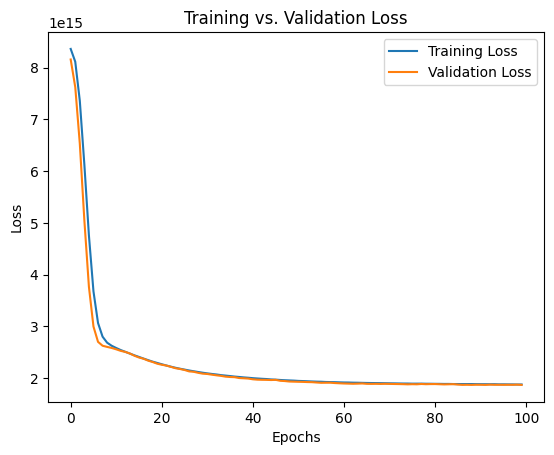

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_data=(X_test_scaled, y_test))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

This graph of training vs. validation loss show that the training loss starts high and decreases rapidly during the first 20 epochs. The validation loss follows a similar pattern to the training loss, starting high and decreasing rapidly. This is promising as it shows that that model is effectively learning and generalizing well to new data.

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Neural Network Metrics:
MSE: 1864870989207141.5
MAE: 26594144.292353153


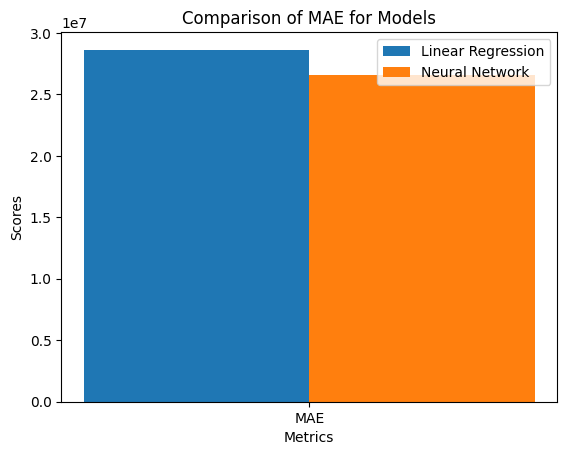

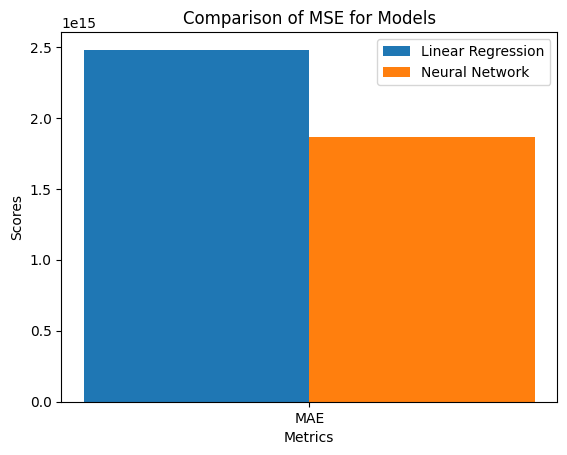

In [ ]:
y_nn_pred = model.predict(X_test_scaled)

mse_nn = mean_squared_error(y_test, y_nn_pred)
mae_nn = mean_absolute_error(y_test, y_nn_pred)

metrics = ['MAE']
print(f"Neural Network Metrics:")
print(f"MSE: {mse_nn}")
print(f"MAE: {mae_nn}")
lr_scores = [mae_test_lr]
nn_scores = [ mae_nn]


x = np.arange(len(metrics))

width = 0.35

fig, ax = plt.subplots()
bars_lr = ax.bar(x - width/2, lr_scores, width, label='Linear Regression')
bars_nn = ax.bar(x + width/2, nn_scores, width, label='Neural Network')


ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MAE for Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


plt.show()

metrics = ['MAE']
lr_scores = [mse_test_lr]
nn_scores = [ mse_nn]

x = np.arange(len(metrics))


width = 0.35


fig, ax = plt.subplots()
bars_lr = ax.bar(x - width/2, lr_scores, width, label='Linear Regression')
bars_nn = ax.bar(x + width/2, nn_scores, width, label='Neural Network')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MSE for Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()



This comparision of the MAE and MSE of the neural network and the linear regression model shows that the neural network is doing a better job of predicting the domestic box office of the movies.

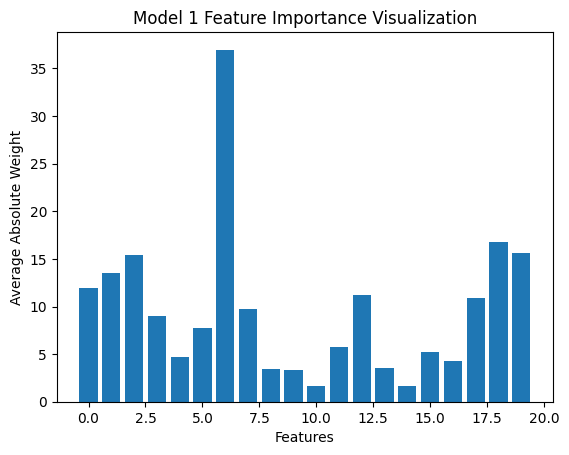

In [ ]:
first_layer_weights = model.layers[0].get_weights()[0]
avg_weights = np.mean(np.abs(first_layer_weights), axis=1)

plt.bar(range(len(avg_weights)), avg_weights)
plt.xlabel('Features')
plt.ylabel('Average Absolute Weight')
plt.title('Model 1 Feature Importance Visualization')
plt.show()

Here we can see that a singular feature 6 has a much higher average absolute weight than the other features meaning that the model could be depending on this single feature to make it's predictions. This feature dependence could be a result of overfitting and could hurt the models ability to generalize to unseen data.

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


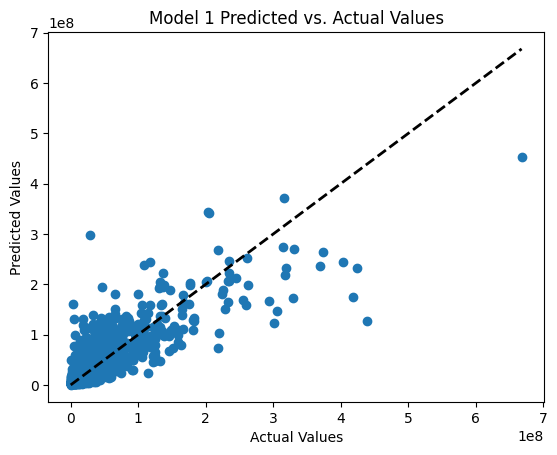

In [ ]:
y_pred = model.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model 1 Predicted vs. Actual Values')
plt.show()

Here we can see that while the values are generally in the right area they bloom out from the actual values quite a bit meaning that this model has some issues.

Overall this model has been pretty successful but I feel that we can acheve even better performance with and more refined approach. To do this we will create a second model that will hopefully improve some of the firsts short comings.

In [ ]:
model2 = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model2.compile(optimizer=Adam(learning_rate=0.09), loss=tf.keras.losses.logcosh, metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=5,
                              min_lr=1e-6,
                              verbose=1)

history2 = model2.fit(X_train_scaled, y_train, epochs=200, batch_size=16,
          validation_data=(X_test_scaled, y_test), callbacks=[early_stopping, reduce_lr])

loss, mae = model2.evaluate(X_test_scaled, y_test)
print(f"Test loss: {loss}, Test MAE: {mae}")

avg_gross = y_test.mean()
mae_percentage_error = mae / avg_gross * 100
print(f"MAE as percentage of average domestic gross: {mae_percentage_error}%")

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 52445084.0000 - mae: 52445084.0000 - val_loss: 35150808.0000 - val_mae: 35150808.0000 - learning_rate: 0.0900
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30784162.0000 - mae: 30784162.0000 - val_loss: 31023916.0000 - val_mae: 31023916.0000 - learning_rate: 0.0900
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24894604.0000 - mae: 24894604.0000 - val_loss: 25131600.0000 - val_mae: 25131600.0000 - learning_rate: 0.0900
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27734312.0000 - mae: 27734312.0000 - val_loss: 23995880.0000 - val_mae: 23995884.0000 - learning_rate: 0.0900
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26297968.0000 - mae: 26297968.0000 - val_loss: 21692246.0000 - val_mae: 21692246.0000 - learning_rate: 0.0900
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24883954.0000 - mae: 24883954.0000 - val_loss: 22809074.0000 - val_mae: 22809074.000

Model 2 improves upon Model 1 by using a deeper architecture with three hidden layers (128, 64, and 32 units) to capture more complex patterns. It incorporates BatchNormalization and Dropout after each dense layer to enhance training stability, speed, and generalization. Model 2 also includes a ReduceLROnPlateau callback to adjust the learning rate when the validation loss plateaus and an EarlyStopping callback to prevent overfitting by halting training when no improvement is observed. It uses logcosh as a loss function to reduce the impact of outliers, trains with a larger batch size of 16 for faster convergence, and is trained for 200 epochs to allow more time for learning. Additionally, Model 2 monitors validation performance in real-time, helping prevent overfitting.

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


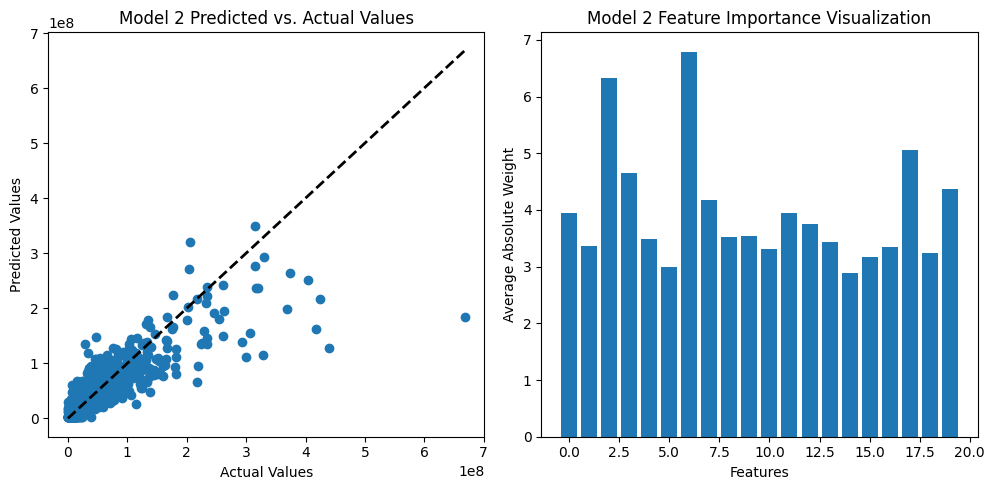

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

y_pred = model2.predict(X_test_scaled)

ax[0].scatter(y_test, y_pred)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('Model 2 Predicted vs. Actual Values')

first_layer_weights = model2.layers[0].get_weights()[0]
avg_weights = np.mean(np.abs(first_layer_weights), axis=1)

ax[1].bar(range(len(avg_weights)), avg_weights)
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Average Absolute Weight')
ax[1].set_title('Model 2 Feature Importance Visualization')

plt.tight_layout()

plt.show()



This graph shows the predicted values of the model agianst their actual values. From this we can see that the new model has not avoided all of the issues within the original model but it has managed to group the majority more acurately than the first. The other major postive is that the average of the weights is much more similar which means than we have managed to avoid the overfitting that was occuring in the first model.

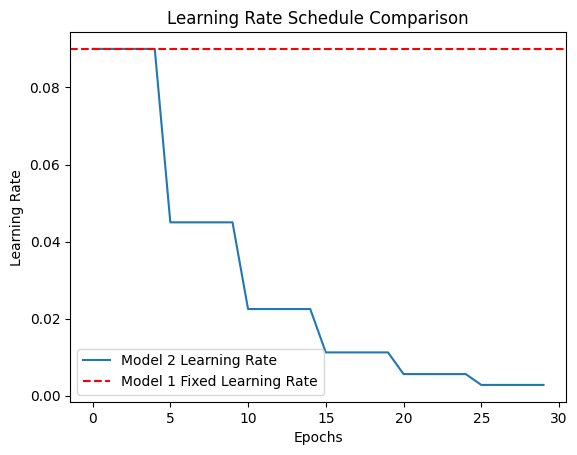

In [ ]:
learning_rates = [0.09 * (0.5**(i // 5)) for i in range(len(history2.history['loss']))]

plt.plot(range(len(learning_rates)), learning_rates, label='Model 2 Learning Rate')
plt.axhline(0.09, color='r', linestyle='--', label='Model 1 Fixed Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule Comparison')
plt.legend()
plt.show()

Here we can see that the the learning rate scheduler is working as intended by lowering the learning rate as the model platues allowing the end result to be more fine tuned and accurate.

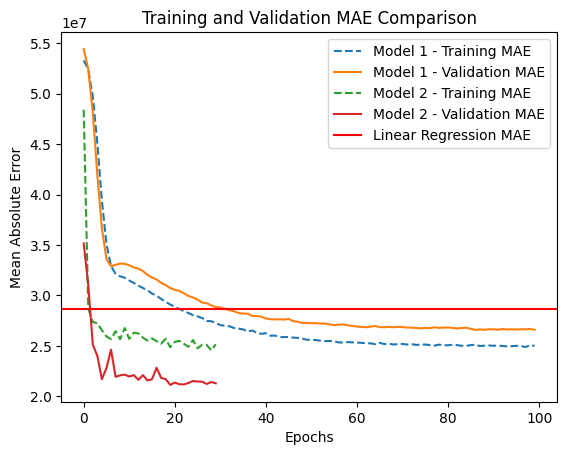

In [ ]:
plt.plot(history.history['mae'], label='Model 1 - Training MAE', linestyle='--')
plt.plot(history.history['val_mae'], label='Model 1 - Validation MAE')
plt.plot(history2.history['mae'], label='Model 2 - Training MAE', linestyle='--')
plt.plot(history2.history['val_mae'], label='Model 2 - Validation MAE')

lr_mae = mae_test_lr
plt.axhline(y=lr_mae, color='red', linestyle='-', label=f'Linear Regression MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE Comparison')
plt.legend()
plt.show()

In this graph we can see that Model 1 on the training data decreases steadily and stabilizes around $2.5*10^{7}$. On the validation set it decreases initially but then stabilizes around $3.0 * 10^{7}$, which is higher than the training MAE. This might indicate some overfitting as the model performs better on the training data than on the validation data.

For Model 2 the Training MAE It decreases more rapidly compared to Model 1 and stabilizes around $2.2 * 10^{7}$. The validation MAE also decreases rapidly and, despite some fluctuations, stabilizes around $2.0 * 10^{7}$. This indicates that Model 2 has better generalization and performs well on both training and validation data.

In conclusion Model 2 generalizes better to the validation data as indicated by its lower and more stable validation MAE. Model 2 outperforms Model 1 in terms of both training and validation errors, suggesting that it is more accurate and reliable.

The MAE score of the linear regression model is inclued as a baseline which shows that both models managed to improve over it meaning that a neural networks was likely a better fit for this dataset.

After training, we got much better results. By training the neural network, we were able to achieve an MAE of ~16,000,000, which in contrast to average movie box office, is pretty good. This would mean that we are sitting at around a 5-10% error, which exceeds far more than any results we had gotten with previoud regression models from before. It is clear that encoding the directors based on their average domestic box office showed a clear relation to a director and their success in a movie.

In conclusion, we learned that although Linear regression can be powerful and fast, there are clear limitations depending on the dataset given. Within this process, we learned how to standardize new and diverse data, train a baseline linear regression model, add relation columns to increase dimensionality, train a neural network, and hyper-tune the values to increase efficiency.

Who did what:

Nels Motley: focused on the process of training and optimizing the neural networks. Also created the data visualizations that were used to display the results of our experiments.

Brice Davis: Did the baseline linear regression and did all the work to optimize the dataset for the neural networks. This helped with all the neural network code.